In [1]:
from importlib import import_module
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Specify the run ID (aka problem name).
runid = "linecurrent_nPBxByBz"

# Add the subdirectory for the run results to the module search path.
run_path = os.path.join(".", runid)
sys.path.append(run_path)

# Import the problem definition from the run results directory.
p = import_module(runid)

# Read the run hyperparameters from the run results directory.
import hyperparameters as hp

2023-02-03 13:52:25.752943: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load the training points.
txy_train = np.loadtxt(os.path.join(runid, "X_train.dat"))
t_train = txy_train[:, 0]
x_train = txy_train[:, 1]
y_train = txy_train[:, 2]

In [4]:
# Extract the unique training point values.
t_train_vals = np.unique(t_train)
x_train_vals = np.unique(x_train)
y_train_vals = np.unique(y_train)
n_t_train_vals = len(t_train_vals)
n_x_train_vals = len(x_train_vals)
n_y_train_vals = len(y_train_vals)

In [7]:
# Load the data locations and values.
txy_data = np.loadtxt(os.path.join(runid, "XY_data.dat"))

# Extract the initial conditions.
bc0 = txy_data[:, -5:]

Text(0, 0.5, '$y$')

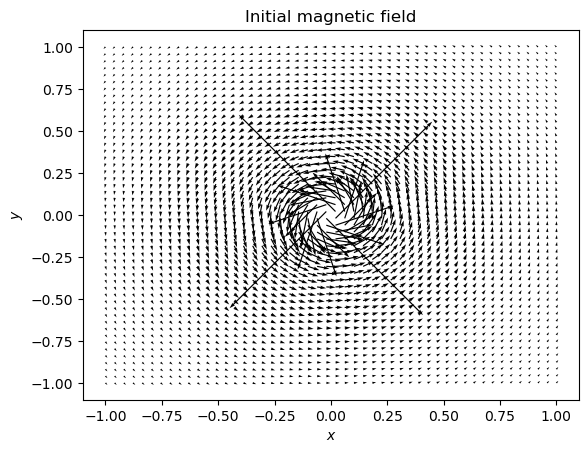

In [8]:
# Plot the initial magnetic field.
X = txy_data[:, 1]
Y = txy_data[:, 2]
U = bc0[:, 2]
V = bc0[:, 3]
plt.quiver(X, Y, U, V, scale=20)
plt.title("Initial magnetic field")
plt.xlabel("$x$")
plt.ylabel("$y$")

In [9]:
# Load the model-predicted values.
ψ = []
delψ = []
for i in range(len(p.dependent_variable_names)):
    var_name = p.dependent_variable_names[i]
    ψ.append(np.loadtxt(os.path.join(runid, "%s_train.dat" % var_name)))
    delψ.append(np.loadtxt(os.path.join(runid, "del_%s_train.dat" % var_name)))


Text(0, 0.5, '$y$')

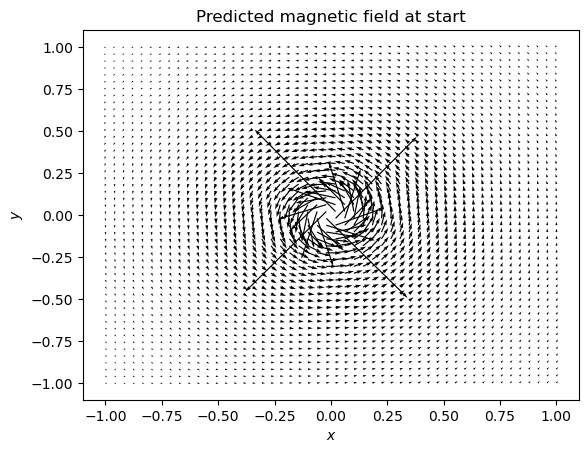

In [10]:
n_start = n_x_train_vals*n_y_train_vals
X = x_train[:n_start]
Y = y_train[:n_start]
U = ψ[2][:n_start]
V = ψ[3][:n_start]
plt.quiver(X, Y, U, V)
plt.title("Predicted magnetic field at start")
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0, 0.5, '$y$')

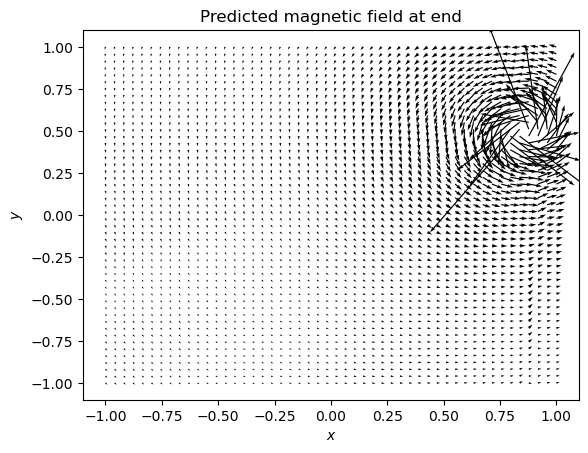

In [11]:
n_end = n_x_train_vals*n_y_train_vals
X = x_train[-n_end:]
Y = y_train[-n_end:]
U = ψ[2][-n_end:]
V = ψ[3][-n_end:]
plt.quiver(X, Y, U, V)
plt.title("Predicted magnetic field at end")
plt.xlabel("$x$")
plt.ylabel("$y$")

In [ ]:
fig, axes = plt.subplots()
axes.set_aspect(1.0)
plt.scatter(X, Y)
plt.title("Training points")
plt.xlabel("$x$")
plt.ylabel("$y$")